# MRI intensity normalization

Intensity normalization of multi-channel MRI images using the method proposed by [Nyul et al. 2000](http://ieeexplore.ieee.org/lpdocs/epic03/wrapper.htm?arnumber=836373).
In the original paper, the authors suggest a method where a set of standard histogram landmarks are learned from a set of MRI images. These landmarks are then used to equalize the histograms of the images to normalize. In both learning and transformation, the histograms are used to find the intensity landmarks. 

## Ackwoledgements: 
* The Python implementation is based on the awesome implementation available here [Reinhold et al. 2019](https://github.com/jcreinhold/intensity-normalization). 
* For this particular tutorial, we use a very small subset from the [Calgary-Campinas dataset](https://sites.google.com/view/calgary-campinas-dataset/home/download).

## Train the standard histogram:
To train the standard histogram, we just have to create a list of the input images to process. Optionally, we can also provide the brainmasks:

In [1]:
import os
import numpy as np
import nibabel as nib
from nyul import nyul_train_standard_scale
  
DATA_DIR = 'data_examples'
T1_name = 'T1.nii.gz'
MASK_name = 'brainmask.nii.gz'

# generate training scans
train_scans = [os.path.join(DATA_DIR, folder, T1_name)
               for folder in os.listdir(DATA_DIR)]
mask_scans = [os.path.join(DATA_DIR, folder, MASK_name)
              for folder in os.listdir(DATA_DIR)]

Then, the train the standard histogram. By default, the parameters are set as follows:
* Minimum percentile to consider `i_min=1`
* Maximum percentile to consider `i_max=99`
* Minimum percentile on the standard histogram `i_s_min=1`
* Maximum percentile on the standard histogram `i_s_max=100`
* Middle percentile lower bound `l_percentile=10`
* Middle percentile upped bound `u_percentile=90`
* number of deciles `step=10`



In [2]:
standard_scale, perc = nyul_train_standard_scale(train_scans, mask_scans)

processing scan  data_examples/CC0358/T1.nii.gz
processing scan  data_examples/CC0357/T1.nii.gz
processing scan  data_examples/CC0006/T1.nii.gz
processing scan  data_examples/CC0356/T1.nii.gz
processing scan  data_examples/CC0140/T1.nii.gz
processing scan  data_examples/CC0139/T1.nii.gz
processing scan  data_examples/CC0002/T1.nii.gz
processing scan  data_examples/CC0001/T1.nii.gz
processing scan  data_examples/CC0226/T1.nii.gz
processing scan  data_examples/CC0228/T1.nii.gz


## Save the standard histogram:

Save the histogram to apply it to unseen images afterwards:

In [3]:
standard_path = 'histograms/standard_test.npy'
np.save(standard_path, [standard_scale, perc])

## Apply intensity normalization to new images:

Finally, the learned histogram can be applied to new images. Here, we just use the same images before and after normalization as an example. 

Text(0.5, 1.0, 'Image 1 Normalized')

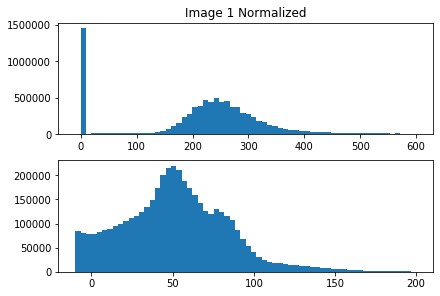

In [5]:
from nyul import nyul_apply_standard_scale
import matplotlib.pyplot as plt

image_1 = nib.load(train_scans[0]).get_data()
mask_1 = nib.load(mask_scans[0]).get_data()
image_1_norm = nyul_apply_standard_scale(image_1, standard_path, input_mask=mask_1)

fig, axs = plt.subplots(2, 1, constrained_layout=True)
f1 = axs[0].hist(image_1.flatten(), bins=64, range=(-10,600))
f2 = axs[1].hist(image_1_norm.flatten(), bins=64, range=(-10,200))
axs[0].set_title('Image 1 Original')
axs[0].set_title('Image 1 Normalized')
